## 🧱 Bloc 1 – Génération du jeu de données

### 🎯 Objectif :
Créer deux classes linéairement séparables dans un plan 2D.  
On veut que la **classe 0** soit autour de `(-1, -1)` et la **classe 1** autour de `(1, 1)` avec un peu de bruit.

### 🧠 Insight :
On va générer deux nuages de points à l’aide de `numpy.random.multivariate_normal`, chacun avec sa propre moyenne et une petite matrice de covariance pour ajouter du bruit.  
Ensuite, on les concatène pour former notre matrice **`X`** (features) et notre vecteur **`y`** (labels).


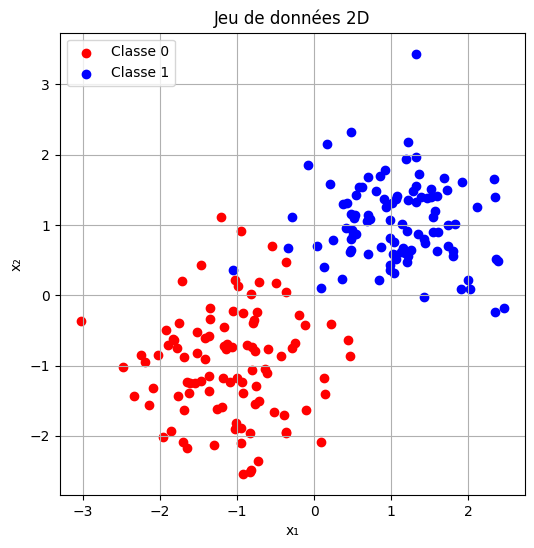

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def generate_data(n_samples=100, random_seed=42):
    np.random.seed(random_seed)
    class_0 = np.random.multivariate_normal(mean=[-1, -1], cov=[[0.6, 0], [0, 0.6]], size=n_samples)
    labels_0 = np.zeros(n_samples)
    class_1 = np.random.multivariate_normal(mean=[1, 1], cov=[[0.4, 0], [0, 0.4]], size=n_samples)
    labels_1 = np.ones(n_samples)
    X = np.vstack((class_0, class_1))
    y = np.concatenate((labels_0, labels_1))

    return X, y
X, y = generate_data()
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Classe 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Classe 1')
plt.title("Jeu de données 2D")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()


## 🧱 Bloc 2 – Initialisation du perceptron

### 🎯 Objectif :
Initialiser les poids (`w₁`, `w₂`) et le biais (`b`) du perceptron, ainsi que fixer quelques hyperparamètres utiles comme le taux d’apprentissage et le nombre d’itérations.

### 🧠 Insight :
Le perceptron est un modèle très simple :

$$
\hat{y} = f(w_1 \cdot x_1 + w_2 \cdot x_2 + b)
$$

où `f` est la fonction d’activation.  
Les poids peuvent être initialisés aléatoirement (petits réels autour de 0), et le biais aussi.  
On gardera tous les poids dans un vecteur **`w = [w₁, w₂]`** pour plus de lisibilité vectorielle.


In [ ]:
def initialize_parameters(n_features, random_seed=42):
    np.random.seed(random_seed)
    w = np.random.randn(n_features)
    b = 0.0
    return w, b

# Exemple :
w, b = initialize_parameters(n_features=2)
print("Poids initiaux :", w)
print("Biais initial :", b)

Poids initiaux : [ 0.49671415 -0.1382643 ]
Biais initial : 0.0


### 🛠 Paramètres globaux utiles :


In [ ]:
learning_rate = 0.1
n_iterations = 50

## 🧱 Bloc 3 – Fonction d’activation : Sigmoide

### 🎯 Objectif :
Implémenter une fonction d’activation sigmoide qui retourne :

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$



In [ ]:
def sigmoid(x):

    return 1 / (1 + np.exp(-x))

### ⚙ Exemple d’utilisation :


In [ ]:
z = np.array([-1.5, 0, 2.3])
sigmoid(z)

array([0.18242552, 0.5       , 0.90887704])

## 🧱 Bloc 4 – Propagation avant (forward pass)

### 🎯 Objectif :
Calculer les sorties du perceptron pour toutes les observations en appliquant :

$$
\hat{y} = f(X \cdot w + b)
$$

où :
- **X** est la matrice des features (forme `(n_samples, 2)`)
- **w** est le vecteur des poids `(2,)`
- **b** est un scalaire
- **f** est la fonction d’activation (ici, Sigmoid)

###🧠 Insight :
Le produit scalaire
$$
𝑋
⋅
𝑤$$
correspond à la somme pondérée de chaque point. On y ajoute le biais `b` pour le décaler, puis on passe ça à `heaviside` pour obtenir des classes prédites (`0` ou `1`).

In [ ]:
def forward(X, w, b, activation_fn):
    z = np.dot(X, w) + b
    return activation_fn(z)

In [ ]:
print(X)

[[-0.61524687 -1.10709907]
 [-0.49830262  0.17973385]
 [-1.18137442 -1.18136171]
 [ 0.22325299 -0.40554761]
 [-1.3636533  -0.5797348 ]
 [-1.3589618  -1.36075272]
 [-0.81257683 -2.4820205 ]
 [-2.33611561 -1.43554605]
 [-1.78453561 -0.75658506]
 [-1.70335242 -2.09396574]
 [ 0.13528665 -1.17488557]
 [-0.94769288 -2.1036052 ]
 [-1.42167705 -0.91407973]
 [-1.89155579 -0.70898557]
 [-1.46525273 -1.22594501]
 [-1.46607994  0.43476851]
 [-1.01045491 -1.81929936]
 [-0.36285945 -1.94566142]
 [-0.83821495 -2.51795395]
 [-2.02880849 -0.84751194]
 [-0.42798625 -0.8672587 ]
 [-1.08958077 -1.23323392]
 [-2.14525821 -1.55758893]
 [-1.35680926 -0.18115664]
 [-0.73383442 -2.36564503]
 [-0.74896564 -1.29828345]
 [-1.52434153 -0.52619758]
 [-0.2013912  -0.27863352]
 [-1.6500551  -1.23951488]
 [-0.74340445 -0.24434599]
 [-1.37116677 -1.14381082]
 [-1.85696339 -1.92657767]
 [-0.3706202   0.05053901]
 [-1.0557788  -0.22266676]
 [-0.71987794 -1.49970761]
 [-0.72006417  0.191358  ]
 [-1.02775073  0.21196776]
 

### ⚙ Exemple d’utilisation :



In [ ]:
# Générer les données
X, y = generate_data()

# Initialiser les paramètres
w, b = initialize_parameters(n_features=2)

# Calculer les prédictions
y_pred = forward(X, w, b, sigmoid)

print("Prédictions (premières 10):", y_pred[:10])


Prédictions (premières 10): [0.46194137 0.43232665 0.39568785 0.54164472 0.35498701 0.38063071
 0.4848937  0.27649856 0.31393307 0.36434412]


In [ ]:
print(w)

[ 0.49671415 -0.1382643 ]


## 🧱 Bloc 5 – Fonction de perte

### 🎯 Objectif :
Implémenter la fonction de perte et suivre l’évolution de l'erreur au cours des itérations. On va également afficher un graphique de la fonction de perte pour observer la convergence du modèle.

# Implémentation d'un Perceptron avec Régression Logistique

## 1. Fonction de Perte (Binary Cross-Entropy)
La fonction de perte pour un échantillon est :
$$
\mathcal{L}_{\text{total}} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$



In [ ]:
def loss_function(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    return (-1/len(y_pred))*np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
def plot_loss(losses):
    plt.plot(losses)
    plt.xlabel("Itérations")
    plt.ylabel("Erreur totale")
    plt.title("Convergence de l'erreur")
    plt.grid(True)
    plt.show()

## 🧱 Bloc 6 – Optimisation par descente de gradient

### 🎯 Objectif :
Optimiser les poids et le biais en utilisant la **méthode de descente de gradient** pour minimiser l'erreur.  
La règle de mise à jour pour un poids  est :
$$

w_i := w_i - \eta \frac{\partial \text{erreur}}{\partial w_i}
$$




Où :
- $\eta$ est le **taux d'apprentissage**
- $\frac{\partial \mathcal{L}}{\partial w_i}$ est la dérivée de la fonction de perte

Pour la fonction de perte binary-cross-entropy : $\nabla\mathcal{L}$ = $\frac{\partial \mathcal{L}}{\partial w_i}$

**Insight :**
$$
\begin{aligned}
w_1 &\leftarrow w_1 - \eta \frac{\partial \mathcal{L}}{\partial w_1} \\
w_2 &\leftarrow w_2 - \eta \frac{\partial \mathcal{L}}{\partial w_2} \\
b &\leftarrow b - \eta \frac{\partial \mathcal{L}}{\partial b}
\end{aligned}
$$

In [ ]:
def gradient_descent(X, y, w, b, learning_rate, n_iterations, activation_fn):
    losses = []


    for iteration in range(n_iterations):
        # Propagation avant (prédiction)
        y_pred = forward(X, w, b, activation_fn)

        # Calcul de l'erreur
        loss = loss_function(y, y_pred)
        losses.append(loss)
        # Calcul du gradient de la perte par rapport aux poids et au biais
        error = y - y_pred  # Différence entre réel et prédit

        # Calcul du gradient par rapport aux poids
        dw = -np.dot(X.T, error) / X.shape[0]  # Moyenne des gradients
        db = -np.sum(error) / X.shape[0]  # Gradient par rapport au biais

        # Mise à jour des poids et du biais
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b, losses


In [ ]:
print(X)
print(y_pred)
print(y)

[[-0.61524687 -1.10709907]
 [-0.49830262  0.17973385]
 [-1.18137442 -1.18136171]
 [ 0.22325299 -0.40554761]
 [-1.3636533  -0.5797348 ]
 [-1.3589618  -1.36075272]
 [-0.81257683 -2.4820205 ]
 [-2.33611561 -1.43554605]
 [-1.78453561 -0.75658506]
 [-1.70335242 -2.09396574]
 [ 0.13528665 -1.17488557]
 [-0.94769288 -2.1036052 ]
 [-1.42167705 -0.91407973]
 [-1.89155579 -0.70898557]
 [-1.46525273 -1.22594501]
 [-1.46607994  0.43476851]
 [-1.01045491 -1.81929936]
 [-0.36285945 -1.94566142]
 [-0.83821495 -2.51795395]
 [-2.02880849 -0.84751194]
 [-0.42798625 -0.8672587 ]
 [-1.08958077 -1.23323392]
 [-2.14525821 -1.55758893]
 [-1.35680926 -0.18115664]
 [-0.73383442 -2.36564503]
 [-0.74896564 -1.29828345]
 [-1.52434153 -0.52619758]
 [-0.2013912  -0.27863352]
 [-1.6500551  -1.23951488]
 [-0.74340445 -0.24434599]
 [-1.37116677 -1.14381082]
 [-1.85696339 -1.92657767]
 [-0.3706202   0.05053901]
 [-1.0557788  -0.22266676]
 [-0.71987794 -1.49970761]
 [-0.72006417  0.191358  ]
 [-1.02775073  0.21196776]
 

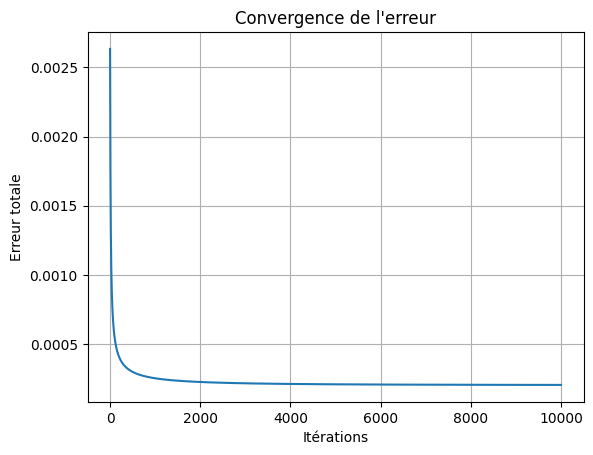

Poids optimisés :  [4.3806393  4.38166006]
Biais optimisé :  -0.7062059556657592


In [ ]:
# Initialiser les paramètres
w, b = initialize_parameters(n_features=2)
learning_rate = 0.1
n_iterations = 10000

# Optimisation par descente de gradient
w, b, losses = gradient_descent(X, y, w, b, learning_rate, n_iterations, sigmoid)

# Afficher les résultats
plot_loss(losses)
print("Poids optimisés : ", w)
print("Biais optimisé : ", b)


## � Bloc 7 – Matrice de confusion et visualisation des performances

### 🎯 Objectif :
Analyser les performances du modèle en affichant la matrice de confusion, pour visualiser les prédictions correctes et les erreurs de classification.

### � Insight :
Une matrice de confusion permet de comparer les valeurs réelles (y) aux valeurs prédites (ŷ).

Pour un problème binaire (0 ou 1), elle est de la forme :

|              | Prédit 0 | Prédit 1 |
|--------------|----------|----------|
| Réel 0       |    a     |    b     |
| Réel 1       |    c     |    d     |


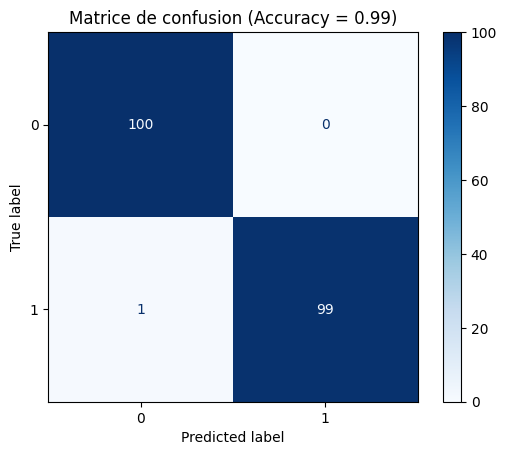

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

z_final = np.dot(X, w) + b
y_pred_proba = sigmoid(z_final)

y_pred_final = (y_pred_proba >= 0.5).astype(int)

cm = confusion_matrix(y, y_pred_final)
acc = accuracy_score(y, y_pred_final)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title(f'Matrice de confusion (Accuracy = {acc:.2f})')
plt.show()


🧱 **Bloc 8 – Visualisation du plan de décision**

🎯 **Objectif** :  
Tracer la droite de séparation apprise par le perceptron / la régression logistique dans l’espace 2D (`x₁`, `x₂`) pour visualiser comment le modèle sépare les deux classes.

---

🧠 **Insight** :  
La frontière de décision est définie par l’équation suivante :

$$
z = w_1 x_1 + w_2 x_2 + b = 0
$$

Ce qui revient à isoler `x₂` :

$$
x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}
$$

C’est la droite où la sortie du modèle est exactement égale à 0.5 (dans le cas de la régression logistique) ou le seuil de classification (dans le cas du perceptron), c’est-à-dire la **limite entre les deux classes**.



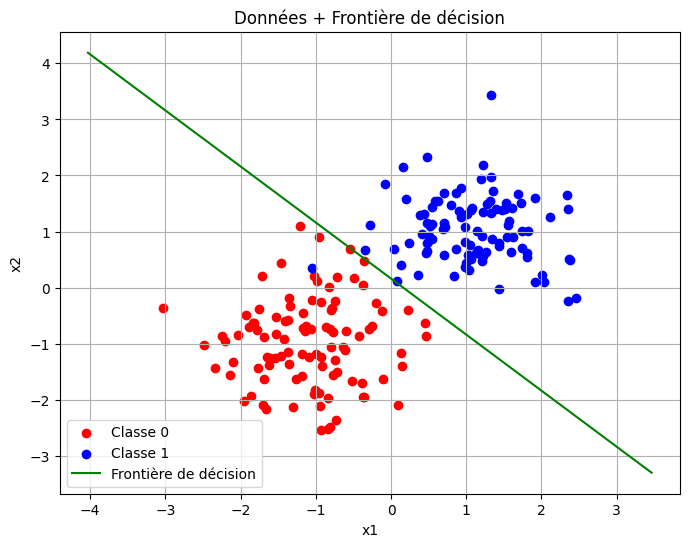

In [ ]:
# Création du graphique avec les points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')

# Calcul de la droite de séparation
x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]

# Tracé de la droite
plt.plot(x1_vals, x2_vals, color='green', label='Frontière de décision')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Données + Frontière de décision')
plt.legend()
plt.grid(True)
plt.show()

1.483603311291807
0.8151162227792658


C:\Users\PRIMERO\AppData\Local\Temp\ipykernel_6444\3897360393.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(nouveau_point[0],nouveau_point[1],c='r',cmap='summer')


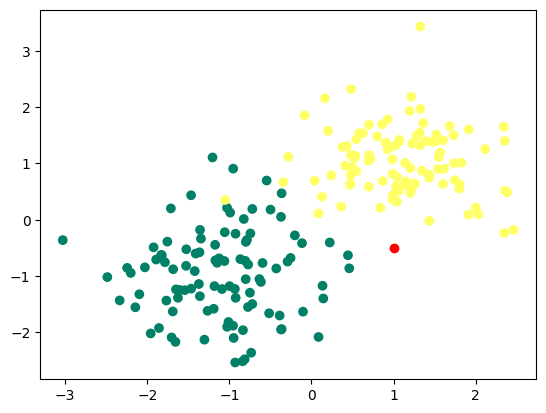

In [ ]:
nouveau_point = np.array([1,-0.5])
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(nouveau_point[0],nouveau_point[1],c='r',cmap='summer')
proba_nouveau_point = sigmoid(np.dot(nouveau_point, w) + b)
print(np.dot(nouveau_point, w) + b)
print(proba_nouveau_point)